# Load raw dataset

In [2]:
# Imports
import pandas as pd
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/1.Projects/Data Science/Telco_churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Preprocessing Pipeline 1 + EDA

In [6]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns


## Dataset Overview

In [7]:
# Feature names, types, and shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
pd.set_option("display.max_columns", None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


- We can see that majority of the columns are object type.
- 2 int types
- 1 float type

To do:
- **I noticed "TotalCharges" should be a float type as well. We will need to convert that.**
- **customerID seems irrelevant to churn prediction. I will drop it**
- **The "SeniorCitizen" feature is currently a numerical column. I will map it into categorical, for easier EDA purposes**

In [9]:
#Convert string series to numberic
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.TotalCharges.dtype

dtype('float64')

In [10]:
# Convert from numerical to categorical, to make more sense during EDA
df.SeniorCitizen = df['SeniorCitizen'].replace({1:'yes', 0:'no'})
df.SeniorCitizen

,SeniorCitizen
0,no
1,no
2,no
3,no
4,no
...,...
7038,no
7039,no
7040,no
7041,yes


In [11]:
#Drop customerID column as it seems irrelevent

df.drop('customerID', axis=1, inplace=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,no,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,no,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,no,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,no,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,no,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,no,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,no,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,no,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


## Explore any missing values and noises of features

In [12]:
df.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


Notice there are 11 nulls for 'TotalCharges'.
Will try to fill the 11 nulls based on the type of distributions

array([[<Axes: title={'center': 'TotalCharges'}>]], dtype=object)

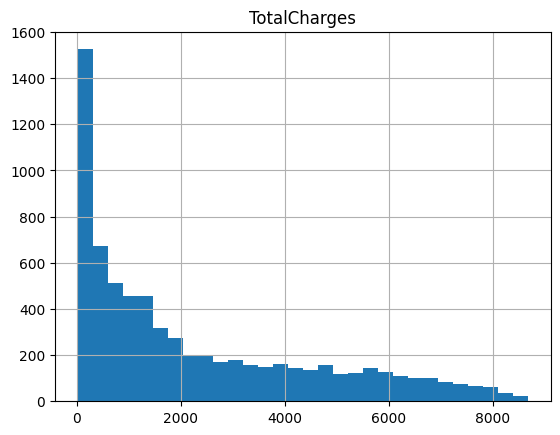

In [13]:
#Check distribution of TotalCharges

df.hist(column='TotalCharges', bins=30)

Since TotalCharges is left skewed and it looks like most of the values are 0(There could be many new customers with 0 total charges).

**I will go ahead and fill the null with the most frequent value**


In [14]:
df.TotalCharges.fillna(0, inplace=True)
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


Great! No more null values.

## Set Feature and Target columns


In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [16]:
# Define feature and target columns

features = df.columns[~df.columns.isin(['Churn'])]
target = df['Churn']

print(features)
print(target)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')
0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object


## Define numerical and categorical features

In [17]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object', 'category']).drop('Churn',axis=1).columns.tolist()
print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)

Numerical columns: ['tenure', 'MonthlyCharges', 'TotalCharges']
Categorical columns: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


## Explore distribution of each column

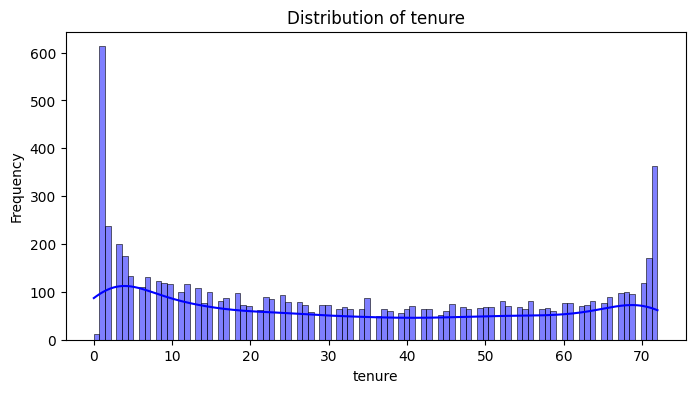

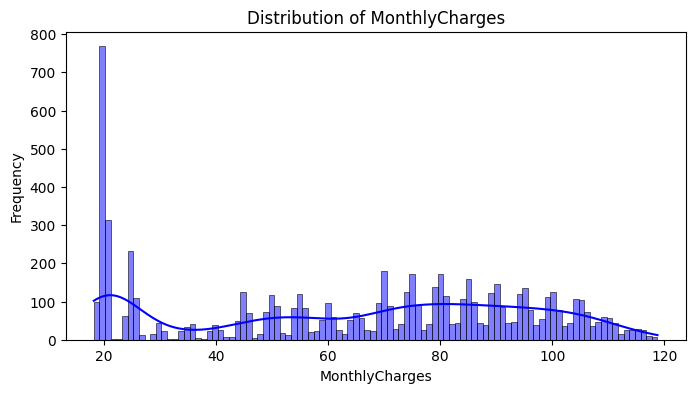

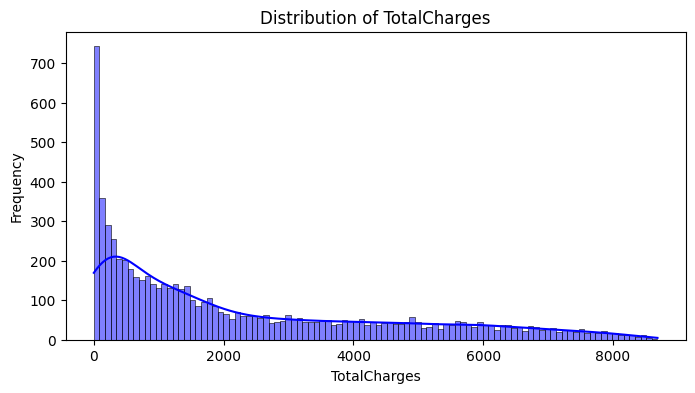

In [18]:
# Create a function for visualizing distribution of numerical columns

def plot_numerical_distributions(df):

    for col in numerical_columns:
        plt.figure(figsize=(8,4))
        sns.histplot(df[col].dropna(), kde=True, bins=100, color='blue')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()


plot_numerical_distributions(df[numerical_columns])

**Findings:**
- Majority of customers have a short tenure. Which means most of them are new customers.
- Majority of customers have a less than $20 month charge.
- Majority of customers have less total accumulated charges, which supports the fact that most customers are new.

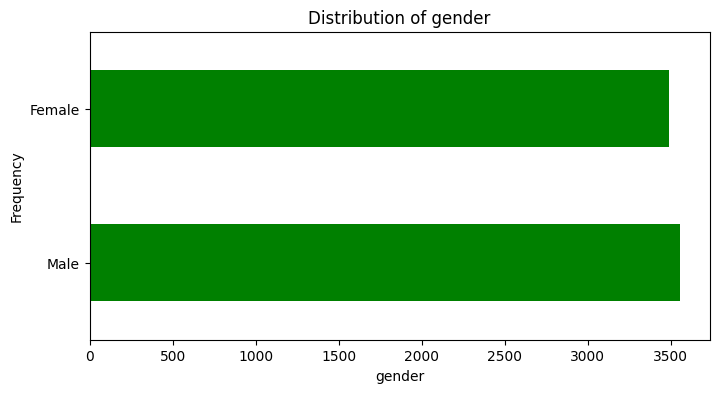

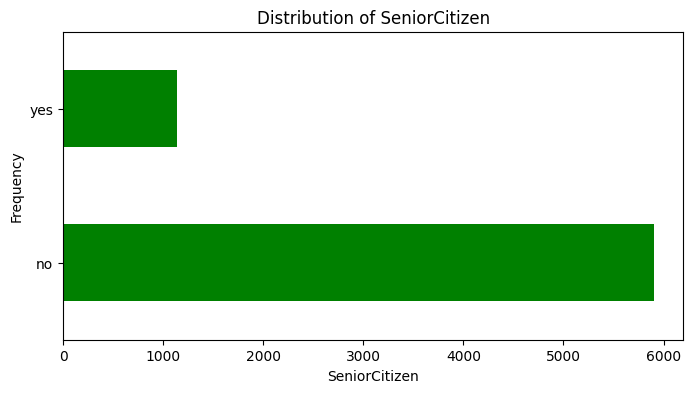

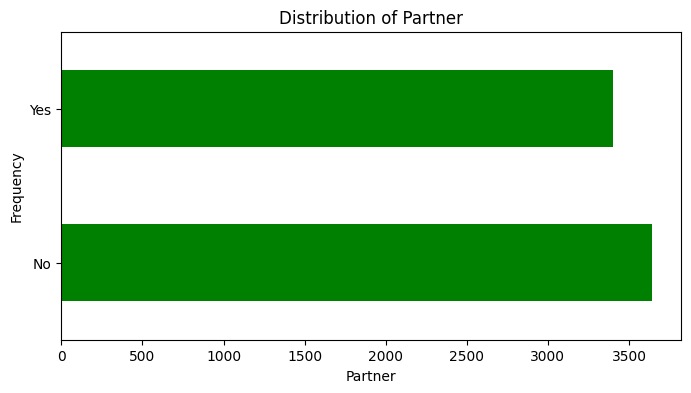

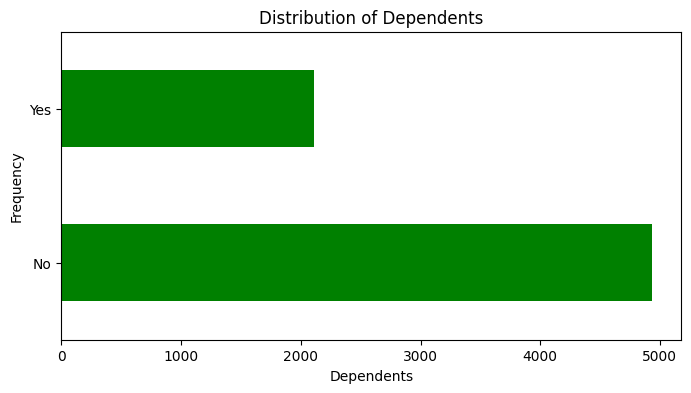

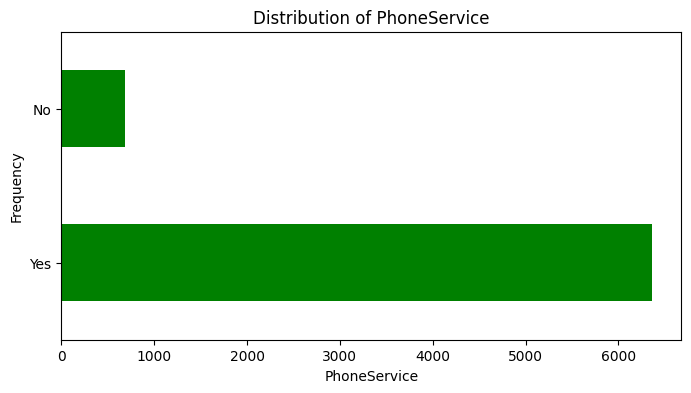

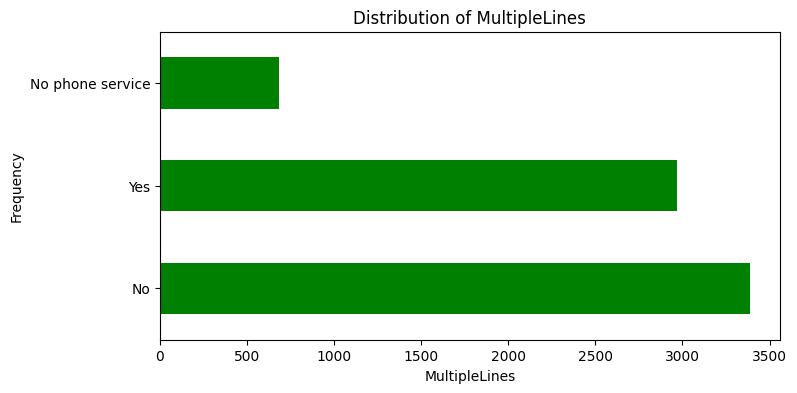

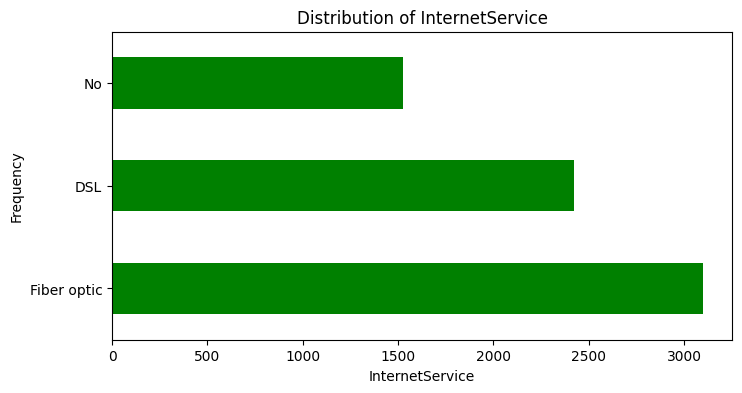

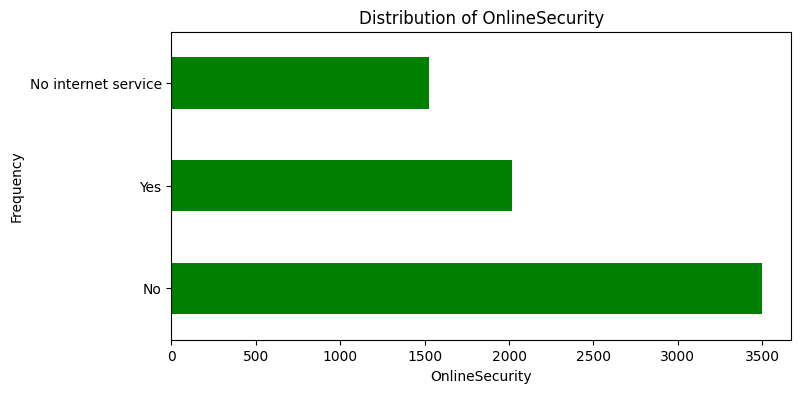

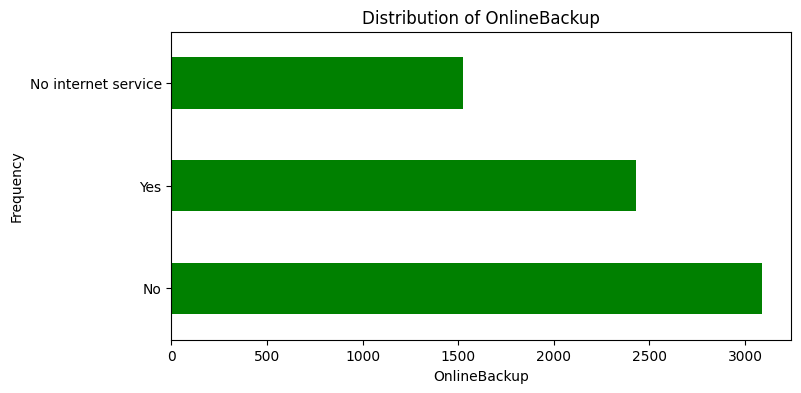

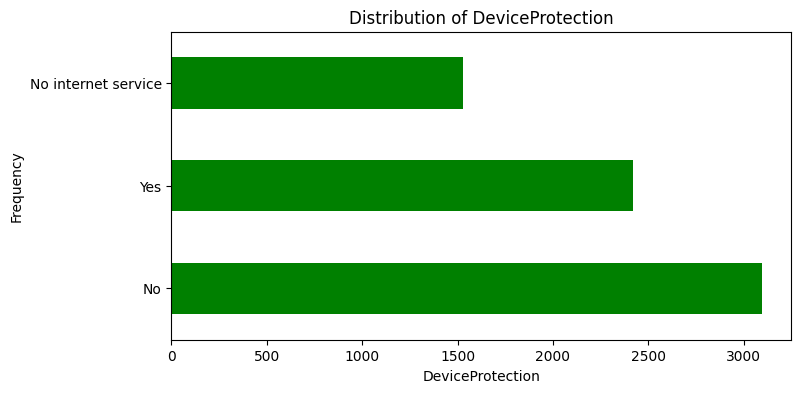

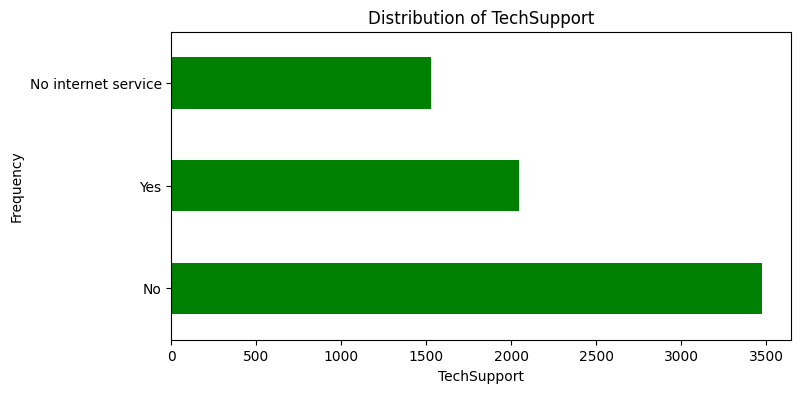

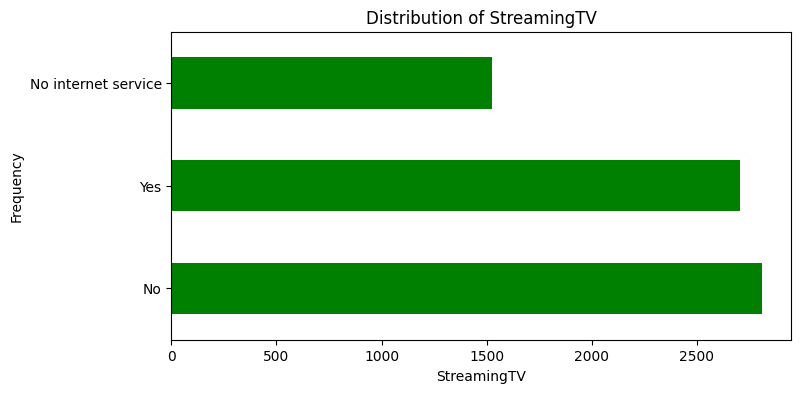

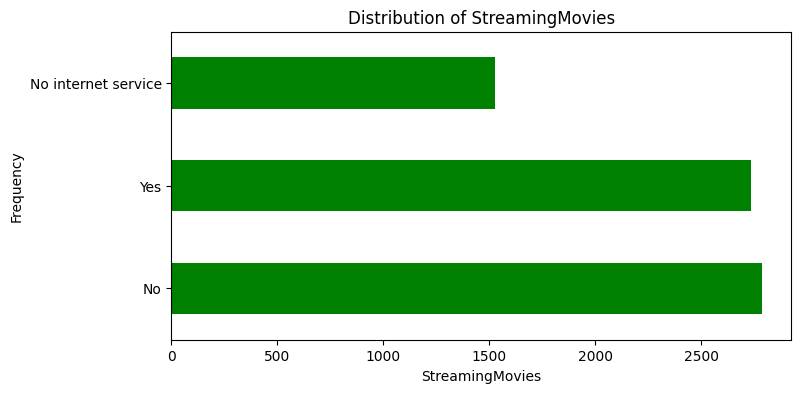

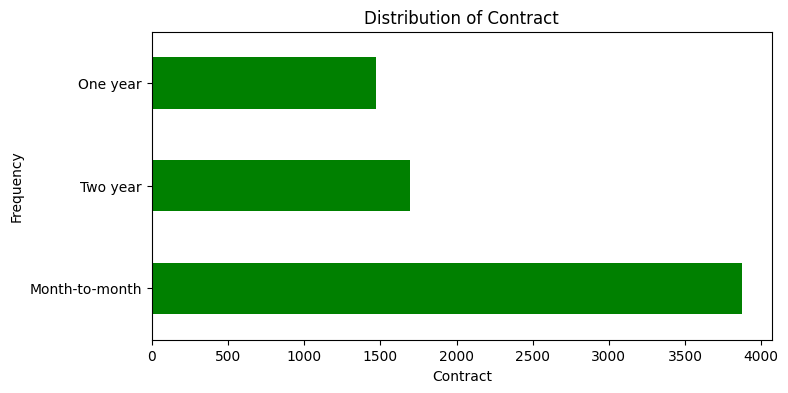

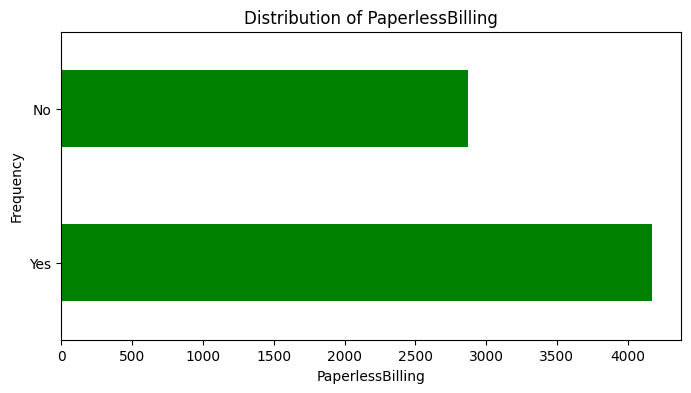

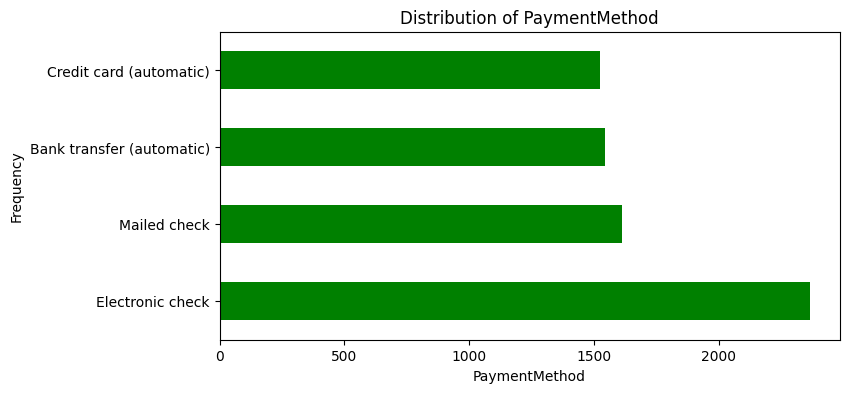

In [19]:
# Create a function for visualizing distribution of categorical columns

def plot_categorical_distributions(df):

    for col in categorical_columns:
        plt.figure(figsize=(8,4))
        df[col].value_counts().plot.barh(color='green')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()


plot_categorical_distributions(df[categorical_columns])

## Churn vs. retain probabilities

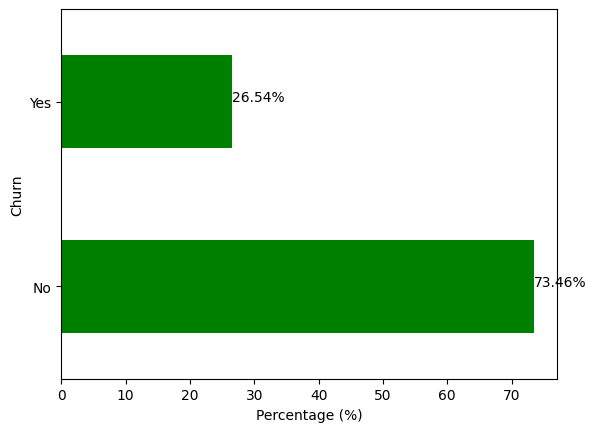

In [20]:
# Calculate percentages
percentages = df['Churn'].value_counts(normalize=True) * 100

# Plot the percentages as a horizontal bar plot
percentages.plot.barh(color='green')

# Add labels to the axes
plt.xlabel('Percentage (%)')
plt.ylabel('Churn')

# Add percentage labels to the bars
for index, value in enumerate(percentages):
    plt.text(value, index, f'{value:.2f}%')

# Show the plot
plt.show()


**We can see that this is an imbalanced dataset.**

### Display churn and retain probability for every categorical feature

In [21]:
import pandas as pd

# Assuming 'Churn' is your target column and 'Yes' indicates churn, 'No' indicates retention
target_column = 'Churn'  # Replace with your actual target column name
churn_value = 'Yes'  # Value indicating churn
retain_value = 'No'  # Value indicating retention

# DataFrame to store results
combined_sorted_probability_df = pd.DataFrame()

# Loop through each categorical column
for col in categorical_columns:
    # Calculate the probabilities
    probabilities = df.groupby(col)[target_column].value_counts(normalize=True).unstack().fillna(0)

    # Rename columns for clarity
    probabilities.columns = [f'P(Churn={retain_value})', f'P(Churn={churn_value})']

    # Combine feature and category names into a single index
    probabilities.index = [f'{col}_{category}' for category in probabilities.index]

    # Concatenate with the main DataFrame
    combined_sorted_probability_df = pd.concat([combined_sorted_probability_df, probabilities])

# Reset index for better readability
combined_sorted_probability_df.reset_index(inplace=True)
combined_sorted_probability_df.rename(columns={'index': 'Feature_Category'}, inplace=True)

# Sort the DataFrame by 'P(Churn=Yes)' in descending order
combined_sorted_probability_df = combined_sorted_probability_df.sort_values(by=f'P(Churn={churn_value})', ascending=False)

# Display the sorted result
print(combined_sorted_probability_df)


                           Feature_Category  P(Churn=No)  P(Churn=Yes)
41           PaymentMethod_Electronic check     0.547146      0.452854
34                  Contract_Month-to-month     0.572903      0.427097
14              InternetService_Fiber optic     0.581072      0.418928
16                        OnlineSecurity_No     0.582333      0.417667
3                         SeniorCitizen_yes     0.583187      0.416813
25                           TechSupport_No     0.583645      0.416355
19                          OnlineBackup_No     0.600712      0.399288
22                      DeviceProtection_No     0.608724      0.391276
31                       StreamingMovies_No     0.663196      0.336804
38                     PaperlessBilling_Yes     0.664349      0.335651
28                           StreamingTV_No     0.664769      0.335231
4                                Partner_No     0.670420      0.329580
6                             Dependents_No     0.687209      0.312791
30    

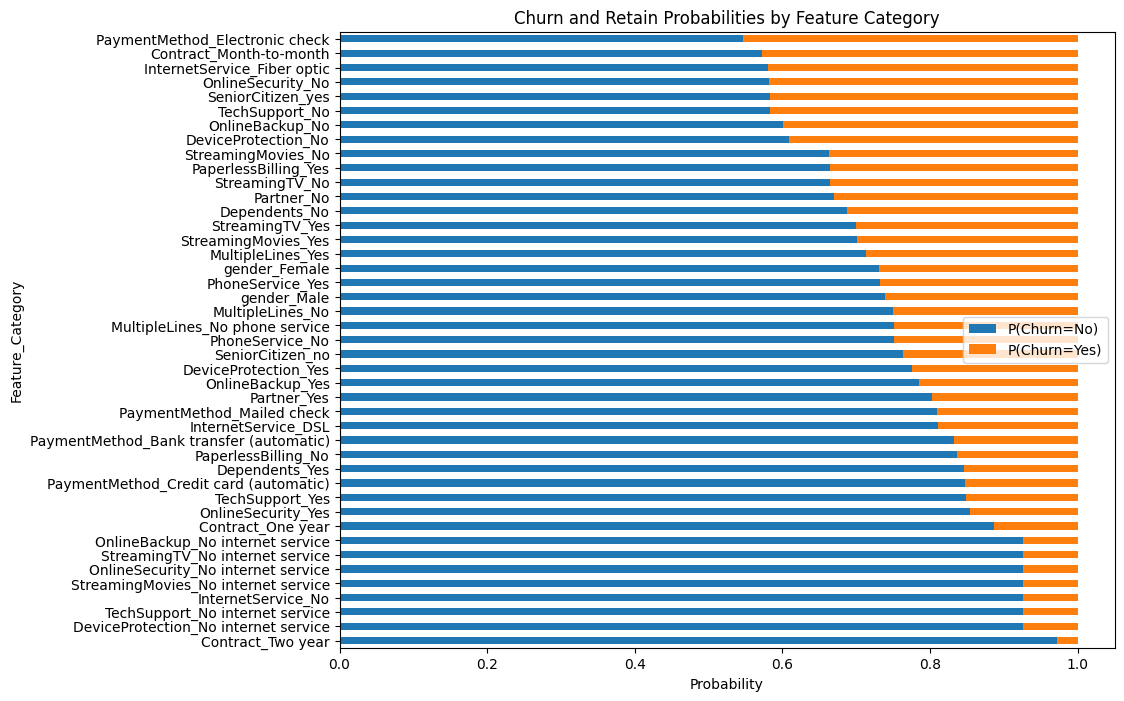

In [22]:
import matplotlib.pyplot as plt

# Reverse the DataFrame to plot highest 'Churn=Yes' probability at the top
combined_sorted_probability_df = combined_sorted_probability_df.iloc[::-1]

# Plot the sorted probabilities
combined_sorted_probability_df.set_index('Feature_Category').plot(kind='barh', stacked=True, figsize=(10, 8))
plt.title('Churn and Retain Probabilities by Feature Category')
plt.xlabel('Probability')
plt.ylabel('Feature_Category')
plt.show()


### Display churn and retain probability for numerical feature

<ipython-input-23-d75ff004b8ac>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_labels = df.groupby(f'{col}_bins')[col].mean()  # or .median() if you prefer
<ipython-input-23-d75ff004b8ac>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_prob = df.groupby(f'{col}_bins')[target_column].apply(lambda x: (x == churn_value).mean())


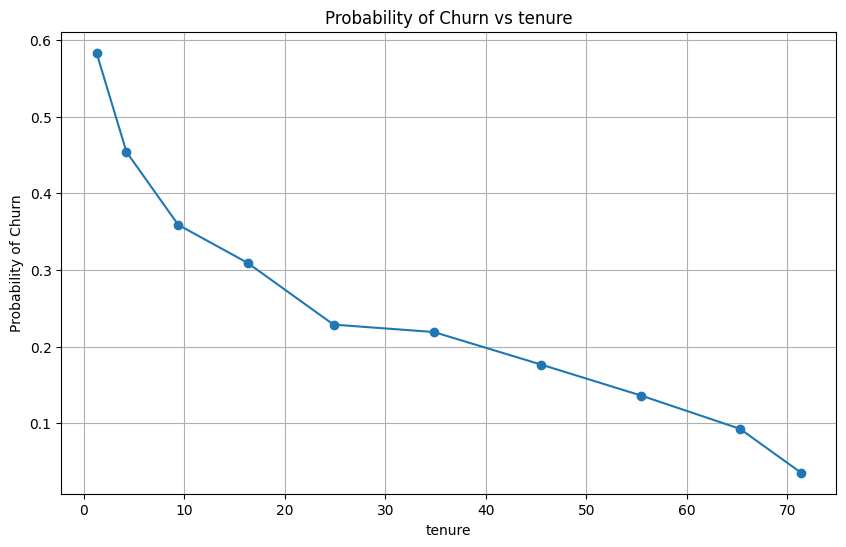

<ipython-input-23-d75ff004b8ac>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_labels = df.groupby(f'{col}_bins')[col].mean()  # or .median() if you prefer
<ipython-input-23-d75ff004b8ac>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_prob = df.groupby(f'{col}_bins')[target_column].apply(lambda x: (x == churn_value).mean())


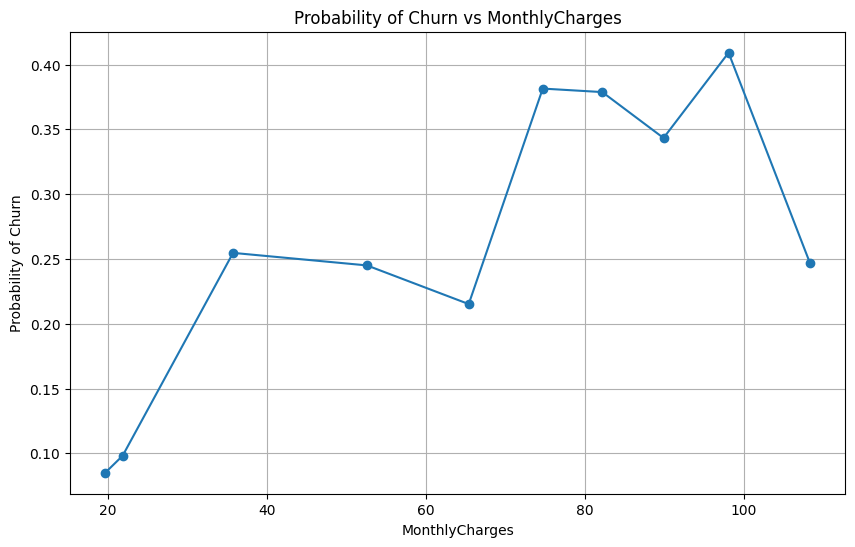

<ipython-input-23-d75ff004b8ac>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_labels = df.groupby(f'{col}_bins')[col].mean()  # or .median() if you prefer
<ipython-input-23-d75ff004b8ac>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_prob = df.groupby(f'{col}_bins')[target_column].apply(lambda x: (x == churn_value).mean())


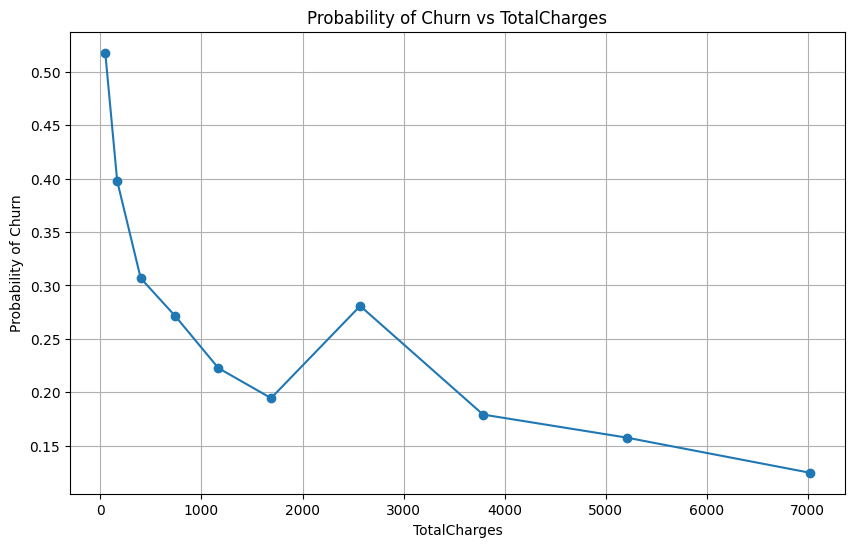

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Create plots for each numerical feature
for col in numerical_columns:
    # Calculate the mean churn probability for each value/bin of the numerical feature
    df[f'{col}_bins'] = pd.qcut(df[col], q=10, duplicates='drop')  # Binning into 10 quantiles

    # Calculate the mean or median of each bin to use as labels
    bin_labels = df.groupby(f'{col}_bins')[col].mean()  # or .median() if you prefer

    churn_prob = df.groupby(f'{col}_bins')[target_column].apply(lambda x: (x == churn_value).mean())

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(bin_labels, churn_prob, marker='o')
    plt.title(f'Probability of Churn vs {col}')
    plt.xlabel(col)
    plt.ylabel('Probability of Churn')
    plt.grid(True)
    plt.show()


**Findings:**
- Higher churn rates usually have less tenure. This means customers are more likely to churn when they are new.
- This is further proven by TotalCharges vs probability of churn graph. Less total charges tend to have higher churn rates.
- Churn probability is positively correlated to higher monthly fees. Which means people tend to churn when monthly fees are too high. However, for monthly fees over $100, churn declined. This could be a psychological effect where people think they are paying high fees for a good service.

## Feature Extraction (to do)

# Preprocessing Pipeline 2

## Train test split

In [24]:
from sklearn.model_selection import train_test_split

y = df['Churn']
X = df.drop('Churn', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Original shape of X:", X.shape)
print("X Training set shape:", X_train.shape)
print("X Testing set shape:", X_test.shape)

print("Original shape of y:", y.shape)
print("y Training set shape:", y_train.shape)
print("y Testing set shape:", y_test.shape)

Original shape of X: (7043, 22)
X Training set shape: (4930, 22)
X Testing set shape: (2113, 22)
Original shape of y: (7043,)
y Training set shape: (4930,)
y Testing set shape: (2113,)


## Encode categorical features to prepare for next steps

To encode categorical features, we first need to distinguish they are ordinal or nominal.
- If ordinal, use ordinal encoding. Ordinal categories has a hierarchical relationships, and ordinal encoder will encode with ordered numbers.
- If nominal, use one hot encoding. This is because the categories have no relationships, they can be all represented as 1s.
- Use label encoder to encode target column. In this case, the Churn

In [25]:
for col in df[categorical_columns]:
    print(df[col].value_counts())
    print('\n')


gender
Male      3555
Female    3488
Name: count, dtype: int64


SeniorCitizen
no     5901
yes    1142
Name: count, dtype: int64


Partner
No     3641
Yes    3402
Name: count, dtype: int64


Dependents
No     4933
Yes    2110
Name: count, dtype: int64


PhoneService
Yes    6361
No      682
Name: count, dtype: int64


MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64


OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64


DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64


TechSupport
No                     3473
Yes                    2044
No internet

**I can see that some categories are redundant in some of the columns. Let's work on optimizing this.
For example, there are feature that contain category "No internet service" and "No". These 2 categories should be merged since choosing "No internet service" would automatically imply "No"**

In [26]:
# Simply replace "No internet service" or "No phone service" with "No"
columns_for_replace = ['OnlineSecurity','OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

X_train[columns_for_replace] = X_train[columns_for_replace].replace({'No internet service': 'No'})

#And replace "No phone service" with "No"
X_train[["MultipleLines"]] = X_train[["MultipleLines"]].replace({"No phone service": "No"})

#Check again categorical columns again
for col in df[categorical_columns]:
    print(df[col].value_counts())
    print('\n')

gender
Male      3555
Female    3488
Name: count, dtype: int64


SeniorCitizen
no     5901
yes    1142
Name: count, dtype: int64


Partner
No     3641
Yes    3402
Name: count, dtype: int64


Dependents
No     4933
Yes    2110
Name: count, dtype: int64


PhoneService
Yes    6361
No      682
Name: count, dtype: int64


MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64


OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64


DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64


TechSupport
No                     3473
Yes                    2044
No internet

In [27]:
ordinal_columns = ['Contract']
nominal_columns = df[categorical_columns].copy().drop(['Contract'], axis=1).columns
target_column = ['Churn']

nominal_columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

## Ordinal encoding

## Orginal encoding on X_train

In [28]:
# Use ordinal encoding for ordinal feature column
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()

X_train_oe_encoded = pd.DataFrame(oe.fit_transform(X_train[ordinal_columns]), columns=['Contract'])

X_train_oe_encoded



,Contract
0,1.0
1,0.0
2,1.0
3,2.0
4,0.0
...,...
4925,0.0
4926,2.0
4927,0.0
4928,0.0


## Ordinal Encoding on X_test

In [29]:
X_test_oe_encoded = pd.DataFrame(oe.transform(X_test[ordinal_columns]), columns=['Contract'])
X_test_oe_encoded

,Contract
0,0.0
1,0.0
2,2.0
3,0.0
4,2.0
...,...
2108,0.0
2109,0.0
2110,2.0
2111,0.0


## One hot encoding

## One hot encoding on X_train

In [30]:
# Use one hot encoder for nominal feature columns
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='if_binary', handle_unknown='ignore') # Drop the binary columns, to reduce num of columns
#Get feature names to be used in the new encoded df
ohe.fit(X_train[nominal_columns])
feature_names = ohe.get_feature_names_out(nominal_columns)
X_train_oh_encoded = pd.DataFrame(ohe.fit_transform(X_train[nominal_columns]).toarray(), columns=feature_names)



## One hot encoding on X_test

In [31]:
X_test_oh_encoded = pd.DataFrame(ohe.transform(X_test[nominal_columns]).toarray(), columns=feature_names)
X_test_oh_encoded

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [5, 7, 8, 9, 10, 11, 12] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,gender_Male,SeniorCitizen_yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2108,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2109,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2110,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2111,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


## Reset index of both encoded categorical columns

In [32]:
#Reset index of both X_train and X_test
X_train_oh_encoded.reset_index(drop=True, inplace=True)
X_train_oe_encoded.reset_index(drop=True, inplace=True)

X_test_oh_encoded.reset_index(drop=True, inplace=True)
X_test_oe_encoded.reset_index(drop=True, inplace=True)

In [33]:
# Combine X_train categorical columns

X_train_combined_encoded = pd.concat([X_train_oh_encoded, X_train_oe_encoded], axis=1)
X_train_combined_encoded

,gender_Male,SeniorCitizen_yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract
0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4925,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4926,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0
4927,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4928,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [34]:
# Combine X_test categorical columns

X_test_combined_encoded = pd.concat([X_test_oh_encoded, X_test_oe_encoded], axis=1)
X_test_combined_encoded

,gender_Male,SeniorCitizen_yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2108,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2109,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2110,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
2111,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


## Comebine numerical and categorical columns

### For X_train

In [35]:
X_train_num_col = X_train[numerical_columns].copy()
X_train_num_col.reset_index(drop=True, inplace=True)

In [36]:
# Combine numberical and categorical columns as one single df

X_train_combined_num_cat = pd.concat([X_train_combined_encoded, X_train_num_col], axis=1)
X_train_combined_num_cat

,gender_Male,SeniorCitizen_yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract,tenure,MonthlyCharges,TotalCharges
0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,54,70.70,3770.00
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,80.55,80.55
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,13,19.30,259.65
3,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,24,96.55,2263.45
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,6,74.10,450.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4925,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1,95.00,95.00
4926,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,23,91.10,2198.30
4927,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,12,21.15,306.05
4928,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,12,99.45,1200.15


### For X_test

In [37]:
X_test_num_col = X_test[numerical_columns].copy()
X_test_num_col.reset_index(drop=True, inplace=True)

In [38]:
# Combine numberical and categorical columns as one single df

X_test_combined_num_cat = pd.concat([X_test_combined_encoded, X_test_num_col], axis=1)
X_test_combined_num_cat

,gender_Male,SeniorCitizen_yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract,tenure,MonthlyCharges,TotalCharges
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,24.80,24.80
1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,41,25.25,996.45
2,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,52,19.35,1031.70
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,76.35,76.35
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,67,50.55,3260.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2108,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,70.15,70.15
2109,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1,44.65,44.65
2110,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,60,60.50,3694.45
2111,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,20,90.70,1781.35


## Label encoding

## Encode y_train

In [39]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

y_train_encoded

array([0, 0, 0, ..., 0, 1, 0])

## Encode y_test

In [40]:
y_test_encoded = le.transform(y_test)
y_test_encoded

array([1, 0, 0, ..., 0, 0, 0])

## Feature Scaling

In [41]:
from sklearn.preprocessing import RobustScaler

# Instantiate the scaler
robust_scaler = RobustScaler()

# Fit and transform on X_train
X_train_scaled = robust_scaler.fit_transform(X_train_combined_num_cat)

# Transform on x_test
X_test_scaled = robust_scaler.transform(X_test_combined_num_cat)



In [42]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)



(4930, 24)
(2113, 24)


**We'll be using the X_train_scaled and X_test_scaled datasets to feed into the ML models.**

## Feature Selection (to do)

## Explore Feature correlations with target(Churn)

There are several ways of viewing correlations
1. Using correlation matrix df.corr() for numerical features
2. If features are categorical, use Cramer's V
3. Find the Mutual Information, which is the amount of information gained about one variable through another.
4. If target is binary, in our case it is. Use Point Biserial Correlation.
5. Using seaborn heatmap

#

## Oversampling with SMOTE

Since this dataset is imbalanced (Rare class is the Churn class), we will apply SMOTE to oversample the rare class to balance with the common class.

In [270]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42, k_neighbors=5)
X_smote, y_smote = sm.fit_resample(X_train_scaled, y_train_encoded)


## Check how imbalanced the 0 and 1 for churn is before transformation

In [230]:
# Check how imbalanced the 0 and 1 for churn is before transformation

num_0 = (y_train_encoded==0).sum()
num_1 = (y_train_encoded==1).sum()

print(f"0: {num_0}")
print(f"1: {num_1}")


0: 3635
1: 1295


**Nice! As we can see above, the classes for churn=0 and churn=1 are balanced!**

## Check whether SMOTE did the job after transformation

In [231]:
# Check 0 and 1 after SMOTE

y_smote_0 = (y_smote==0).sum()
y_smote_1 = (y_smote==1).sum()

print(f"0: {y_smote_0}")
print(f"1: {y_smote_1}")

0: 3635
1: 3635


# Load dataset into tensors

In [342]:
import torch

# X tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)

# y tensors
y_train_tensor = torch.tensor(y_train_encoded, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_encoded, dtype=torch.float32)

In [343]:
print(X_train_tensor.shape)
print(X_test_tensor.shape)
print(y_train_tensor.shape)
print(y_test_tensor.shape)

torch.Size([4930, 24])
torch.Size([2113, 24])
torch.Size([4930])
torch.Size([2113])


# Combine X and y tensors into TensorDataset

In [344]:
from torch.utils.data import TensorDataset

# Train dataset: X train and y train
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)

# Test dataset: X test and y test
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Load TensorDataset into Dataloaders

In [345]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Logistic Regression from scratch with PyTorch

In [346]:
import math
import torch
import torch.nn as nn

# Implenting logistic regression from scratch

class my_logistic_regression(nn.Module):
  def __init__(self, in_features, out_features):
    super(my_logistic_regression, self).__init__()
    # Initialize number of inputs features and output features
    self.in_features = in_features
    self.out_features = out_features

    # Initialize weight and biases randomly as a learnable parameter
    self.weight = nn.Parameter(torch.empty(self.out_features, self.in_features, dtype=torch.float32))
    nn.init.xavier_uniform_(self.weight)
    self.bias = nn.Parameter(torch.zeros(self.out_features, dtype=torch.float32))

  # define the sigmoid function
  # def sigmoid(self, z):
  #   self.input = z
  #   return 1 / (1 + torch.exp(-z))

  def forward(self, x):
    y_pred = torch.sigmoid(torch.matmul(x, self.weight.T) + self.bias)

    return y_pred




In [347]:
# Implementing the loss function for logistic regression from scratch

class my_BCELoss(nn.Module):
  def __init__(self):
    super(my_BCELoss, self).__init__()
    self.epsilon = 1e-8

  def forward(self, y_pred, y_true):
    x = y_true*torch.log(y_pred + self.epsilon)
    x += (1 - y_true)*torch.log(1 - y_pred + self.epsilon)
    x = x * (-1)

    return torch.mean(x)



## Instantiations & Hyperparameters

In [348]:
import torch
import torch.nn as nn

# Inputs and outputs
n_inputs = X_train_tensor.shape[1]
n_outputs = 1

# Model Instantiation
log_reg = my_logistic_regression(n_inputs, n_outputs)

# Loss function Instantiation
#criterion = nn.BCEWithLogitsLoss()
criterion = my_BCELoss()


# Optimizer Instantiation
optimizer = torch.optim.Adam(log_reg.parameters(), lr=0.001)

# Number of epochs
epochs = 100



## Training & Evaluation loop (For custom model)

In [349]:
# List to store losses for visualization
train_loss = []
eval_loss = []

for epoch in range(epochs):

  for X_batch, y_batch in train_dataloader:

    # Turn on training mode
    log_reg.train()

    # forward pass
    y_pred = log_reg(X_batch)

    # Calculate Loss
    loss = criterion(y_pred.squeeze(), y_batch)

    # Zero out the gradient
    optimizer.zero_grad()

    # Backpropagation on the loss
    loss.backward()

    # Update paramters
    optimizer.step()

    # Put model into evaluation mode
    log_reg.eval()

  # Add to train_loss list
  train_loss.append(loss)

  # Testing
  with torch.inference_mode():

    # forward pass
    test_pred = log_reg(X_test_tensor)

    # Calculate Loss
    test_loss = criterion(test_pred.squeeze(), y_test_tensor)

    # Add to eval_loss list
    eval_loss.append(test_loss)

  print(f"epoch: {epoch}, train loss: {loss.item()}, test loss: {test_loss.item()}")


epoch: 0, train loss: 0.7666385769844055, test loss: 0.8122003674507141
epoch: 1, train loss: 0.6244205236434937, test loss: 0.6958766579627991
epoch: 2, train loss: 0.9442890286445618, test loss: 0.6301043629646301
epoch: 3, train loss: 0.9454914331436157, test loss: 0.5876779556274414
epoch: 4, train loss: 0.43449866771698, test loss: 0.5565594434738159
epoch: 5, train loss: 0.7797986268997192, test loss: 0.5319791436195374
epoch: 6, train loss: 0.34914475679397583, test loss: 0.5120711326599121
epoch: 7, train loss: 0.6166308522224426, test loss: 0.49604925513267517
epoch: 8, train loss: 0.2785009443759918, test loss: 0.4828519821166992
epoch: 9, train loss: 1.4149943590164185, test loss: 0.4724592864513397
epoch: 10, train loss: 0.5980929732322693, test loss: 0.4645457863807678
epoch: 11, train loss: 0.34722551703453064, test loss: 0.4572449326515198
epoch: 12, train loss: 0.5755071043968201, test loss: 0.4510796368122101
epoch: 13, train loss: 0.2073916345834732, test loss: 0.4455

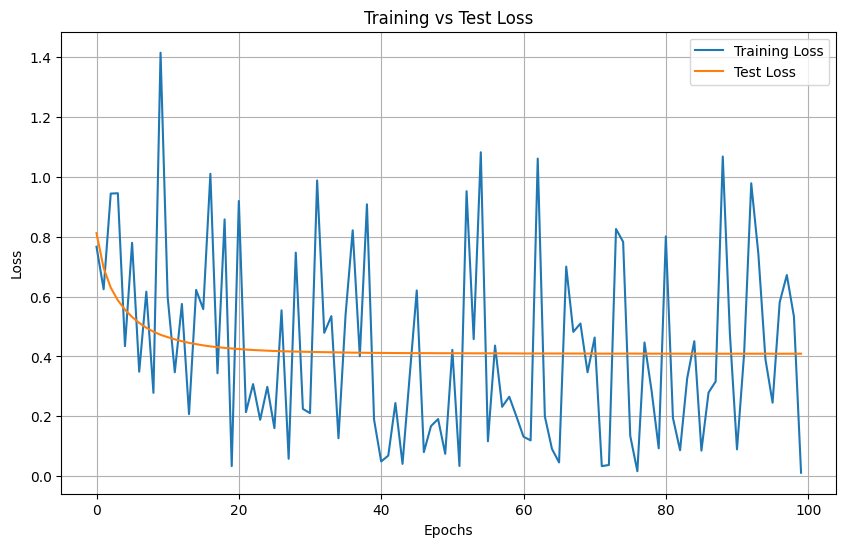

In [350]:
# Visualize the losses
import matplotlib.pyplot as plt
def plot_losses(train_losses, test_losses, epochs):

  # Convert loss tensors to values (detach them from the computational graph)
  train_losses = [loss.detach().item() for loss in train_losses]
  test_losses = [loss.detach().item() for loss in test_losses]

  # Plot the training and test losses
  plt.figure(figsize=(10, 6))
  plt.plot(range(epochs), train_losses, label='Training Loss')
  plt.plot(range(epochs), test_losses, label='Test Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title('Training vs Test Loss')
  plt.legend()
  plt.grid(True)
  plt.show()

plot_losses(train_loss, eval_loss, 100)


# Built-in Logistic Regression

## sklearn Logistic Regression model

In [283]:
# Fit and train into built-in logistic regression model
from sklearn.linear_model import LogisticRegression

logistic_regressin = LogisticRegression()

clf = logistic_regressin.fit(X_smote, y_smote)

y_predict = clf.predict(X_test_scaled)

y_proba = clf.predict_proba(X_test_scaled)


## Evaluation without SMOTE

In [70]:
# Accuracy of prediction
clf.score(X_test_scaled, y_test_encoded)

0.8140085186938003

In [71]:
from sklearn.metrics import recall_score, precision_score, f1_score, classification_report

# Classification Report
print(classification_report(y_test_encoded, y_predict, digits=3))

              precision    recall  f1-score   support

           0      0.851     0.903     0.876      1539
           1      0.688     0.577     0.627       574

    accuracy                          0.814      2113
   macro avg      0.770     0.740     0.752      2113
weighted avg      0.807     0.814     0.809      2113



In [72]:
# Recall score
recall_score(y_test_encoded, y_predict)

0.5766550522648084

In [73]:
# Precision score
precision_score(y_test_encoded, y_predict)

0.6881496881496881

In [74]:
# f1 score
f1_score(y_test_encoded, y_predict)

0.6274881516587677

## Evaluation with SMOTE

In [284]:
# Accuracy of prediction with SMOTE
clf.score(X_test_scaled, y_test_encoded)

0.7557974443918599

In [285]:
from sklearn.metrics import recall_score, precision_score, f1_score, classification_report

# Classification Report
print(classification_report(y_test_encoded, y_predict, digits=3))

              precision    recall  f1-score   support

           0      0.917     0.731     0.813      1539
           1      0.533     0.822     0.647       574

    accuracy                          0.756      2113
   macro avg      0.725     0.777     0.730      2113
weighted avg      0.813     0.756     0.768      2113



In [286]:
# Recall score
recall_score(y_test_encoded, y_predict)

0.8222996515679443

In [287]:
# Precision score
precision_score(y_test_encoded, y_predict)

0.5327313769751693

In [288]:
# f1 score
f1_score(y_test_encoded, y_predict)

0.6465753424657534

## sklearn log loss function without SMOTE

In [75]:
from sklearn.metrics import log_loss

sk_loss = log_loss(y_test_encoded, y_proba)
sk_loss

0.4064196336200599

## sklearn log loss function with SMOTE

In [318]:
from sklearn.metrics import log_loss

sk_loss = log_loss(y_test_encoded, y_proba)
sk_loss

0.47809585894359596

## Compare same log_loss with PyTorch without SMOTE

In [351]:
# Compare to log_loss with PyTorch

from sklearn.metrics import log_loss

# Get predictions from PyTorch model
with torch.no_grad():
    y_pred = log_reg(X_test_tensor)
    y_pred = y_pred.numpy()  # Convert to numpy for compatibility with sklearn

# Calculate log loss
pytorch_log_loss = log_loss(y_test_encoded, y_pred)
print(f'Log Loss for PyTorch Model: {pytorch_log_loss}')


Log Loss for PyTorch Model: 0.40925080363205424


## Compare same log_loss with PyTorch with SMOTE

In [341]:
# Compare to log_loss with PyTorch

from sklearn.metrics import log_loss

# Get predictions from PyTorch model
with torch.no_grad():
    y_pred = log_reg(X_test_tensor)
    y_pred = y_pred.numpy()  # Convert to numpy for compatibility with sklearn

# Calculate log loss
pytorch_log_loss = log_loss(y_test_encoded, y_pred)
print(f'Log Loss for PyTorch Model: {pytorch_log_loss}')


Log Loss for PyTorch Model: 0.4798791342718573
